In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
trainer=pd.read_csv('train.csv')
trainer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
def categorize_age(age):
    if age == '0-17':
        return 1
    elif age == '18-25':
        return 2
    elif age == '26-35':
        return 3
    elif age == '36-45':
        return 4
    elif age == '46-50':
        return 5
    elif age == '51-55':
        return 6
    elif age == '55+':
        return 7

In [5]:
trainer['age_categ']=trainer['Age'].apply(lambda x: categorize_age(x))

In [6]:
trainer.drop('Age',axis=1,inplace=True)
trainer.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ
0,1000001,P00069042,F,10,A,2,0,3,NaN,NaN,8370,1
1,1000001,P00248942,F,10,A,2,0,1,6.0,14.0,15200,1
2,1000001,P00087842,F,10,A,2,0,12,NaN,NaN,1422,1
3,1000001,P00085442,F,10,A,2,0,12,14.0,NaN,1057,1
4,1000002,P00285442,M,16,C,4+,0,8,NaN,NaN,7969,7


In [7]:
tester=pd.read_csv('test.csv')
tester.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
tester['age_categ']=tester['Age'].apply(lambda x: categorize_age(x))

In [9]:
tester.drop('Age',axis=1,inplace=True)
tester.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ
0,1000004,P00128942,M,7,B,2,1,1,11.0,NaN,5
1,1000009,P00113442,M,17,C,0,0,3,5.0,NaN,3
2,1000010,P00288442,F,1,B,4+,1,5,14.0,NaN,4
3,1000010,P00145342,F,1,B,4+,1,4,9.0,NaN,4
4,1000011,P00053842,F,1,C,1,0,4,5.0,12.0,3


In [10]:
gender=pd.get_dummies(trainer['Gender'],drop_first=True)
gender

,M
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,1
9,1


In [11]:
trainer.drop('Gender',axis=1,inplace=True)
trainer=pd.concat([trainer,gender],axis=1)
trainer.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M
0,1000001,P00069042,10,A,2,0,3,NaN,NaN,8370,1,0
1,1000001,P00248942,10,A,2,0,1,6.0,14.0,15200,1,0
2,1000001,P00087842,10,A,2,0,12,NaN,NaN,1422,1,0
3,1000001,P00085442,10,A,2,0,12,14.0,NaN,1057,1,0
4,1000002,P00285442,16,C,4+,0,8,NaN,NaN,7969,7,1


In [12]:
gender=pd.get_dummies(tester['Gender'],drop_first=True)
gender

,M
0,1
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [13]:
tester.drop('Gender',axis=1,inplace=True)

In [14]:
tester.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ
0,1000004,P00128942,7,B,2,1,1,11.0,NaN,5
1,1000009,P00113442,17,C,0,0,3,5.0,NaN,3
2,1000010,P00288442,1,B,4+,1,5,14.0,NaN,4
3,1000010,P00145342,1,B,4+,1,4,9.0,NaN,4
4,1000011,P00053842,1,C,1,0,4,5.0,12.0,3


In [15]:
tester=pd.concat([tester,gender],axis=1)

In [16]:
tester.head()

,User_ID,Product_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M
0,1000004,P00128942,7,B,2,1,1,11.0,NaN,5,1
1,1000009,P00113442,17,C,0,0,3,5.0,NaN,3,1
2,1000010,P00288442,1,B,4+,1,5,14.0,NaN,4,0
3,1000010,P00145342,1,B,4+,1,4,9.0,NaN,4,0
4,1000011,P00053842,1,C,1,0,4,5.0,12.0,3,0


In [17]:
city=pd.get_dummies(trainer['City_Category'],drop_first=False)
trainer.drop('City_Category',axis=1,inplace=True)
trainer=pd.concat([trainer,city],axis=1)

In [18]:
trainer.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,A,B,C
0,1000001,P00069042,10,2,0,3,NaN,NaN,8370,1,0,1,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200,1,0,1,0,0
2,1000001,P00087842,10,2,0,12,NaN,NaN,1422,1,0,1,0,0
3,1000001,P00085442,10,2,0,12,14.0,NaN,1057,1,0,1,0,0
4,1000002,P00285442,16,4+,0,8,NaN,NaN,7969,7,1,0,0,1


In [19]:
city=pd.get_dummies(tester['City_Category'],drop_first=False)
tester.drop('City_Category',axis=1,inplace=True)
tester=pd.concat([tester,city],axis=1)

In [20]:
tester.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,A,B,C
0,1000004,P00128942,7,2,1,1,11.0,NaN,5,1,0,1,0
1,1000009,P00113442,17,0,0,3,5.0,NaN,3,1,0,0,1
2,1000010,P00288442,1,4+,1,5,14.0,NaN,4,0,0,1,0
3,1000010,P00145342,1,4+,1,4,9.0,NaN,4,0,0,1,0
4,1000011,P00053842,1,1,0,4,5.0,12.0,3,0,0,0,1


In [21]:
trainer.fillna(0,inplace=True)

In [22]:
trainer.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,A,B,C
0,1000001,P00069042,10,2,0,3,0.0,0.0,8370,1,0,1,0,0
1,1000001,P00248942,10,2,0,1,6.0,14.0,15200,1,0,1,0,0
2,1000001,P00087842,10,2,0,12,0.0,0.0,1422,1,0,1,0,0
3,1000001,P00085442,10,2,0,12,14.0,0.0,1057,1,0,1,0,0
4,1000002,P00285442,16,4+,0,8,0.0,0.0,7969,7,1,0,0,1


In [23]:
tester.fillna(0,inplace=True)

In [24]:
tester.head()

,User_ID,Product_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,A,B,C
0,1000004,P00128942,7,2,1,1,11.0,0.0,5,1,0,1,0
1,1000009,P00113442,17,0,0,3,5.0,0.0,3,1,0,0,1
2,1000010,P00288442,1,4+,1,5,14.0,0.0,4,0,0,1,0
3,1000010,P00145342,1,4+,1,4,9.0,0.0,4,0,0,1,0
4,1000011,P00053842,1,1,0,4,5.0,12.0,3,0,0,0,1


In [25]:
trainer.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [26]:
trainer.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,A,B,C
0,10,2,0,3,0.0,0.0,8370,1,0,1,0,0
1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0
2,10,2,0,12,0.0,0.0,1422,1,0,1,0,0
3,10,2,0,12,14.0,0.0,1057,1,0,1,0,0
4,16,4+,0,8,0.0,0.0,7969,7,1,0,0,1


In [27]:
def city_years(years):
    if years=='4+':
        return 4
    return years

In [28]:
trainer['city_years']=trainer['Stay_In_Current_City_Years'].apply(lambda x: city_years(x))

In [29]:
trainer.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [30]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,A,B,C,city_years
0,10,0,3,0.0,0.0,8370,1,0,1,0,0,2
1,10,0,1,6.0,14.0,15200,1,0,1,0,0,2
2,10,0,12,0.0,0.0,1422,1,0,1,0,0,2
3,10,0,12,14.0,0.0,1057,1,0,1,0,0,2
4,16,0,8,0.0,0.0,7969,7,1,0,0,1,4


In [31]:
tester['city_years']=tester['Stay_In_Current_City_Years'].apply(lambda x: city_years(x))

In [32]:
tester.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [33]:
tester.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [34]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,A,B,C,city_years
0,7,1,1,11.0,0.0,5,1,0,1,0,2
1,17,0,3,5.0,0.0,3,1,0,0,1,0
2,1,1,5,14.0,0.0,4,0,0,1,0,4
3,1,1,4,9.0,0.0,4,0,0,1,0,4
4,1,0,4,5.0,12.0,3,0,0,0,1,1


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
trainer_train,trainer_test,purchase_train,purchase_test=train_test_split(trainer.drop('Purchase',axis=1),trainer['Purchase'],test_size=0.2)

In [37]:
target='Purchase'

In [38]:
trainer_train.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,A,B,C,city_years
413905,7,1,8,17.0,0.0,5,1,0,1,0,1
190867,2,0,13,16.0,0.0,3,1,1,0,0,3
276519,7,0,1,15.0,16.0,4,1,0,1,0,2
271018,1,1,8,0.0,0.0,3,0,1,0,0,1
548221,17,0,20,0.0,0.0,3,0,0,1,0,2


In [39]:
purchase_train.head()

413905     9856
190867      590
276519    19461
271018     6012
548221      363
Name: Purchase, dtype: int64

In [40]:
training=pd.concat([trainer_train,purchase_train],axis=1)

In [41]:
training.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,A,B,C,city_years,Purchase
413905,7,1,8,17.0,0.0,5,1,0,1,0,1,9856
190867,2,0,13,16.0,0.0,3,1,1,0,0,3,590
276519,7,0,1,15.0,16.0,4,1,0,1,0,2,19461
271018,1,1,8,0.0,0.0,3,0,1,0,0,1,6012
548221,17,0,20,0.0,0.0,3,0,0,1,0,2,363


In [42]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Purchase'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Purchase'], cv=cv_folds, scoring='mean_squared_error')
    
    #Print model report:
    print("\nModel Report")
    print("MSE : %.10g" % metrics.mean_squared_error(dtrain['Purchase'].values, dtrain_predictions))
    print("RMSE Score (Train): %f" % np.sqrt(metrics.mean_squared_error(dtrain['Purchase'], dtrain_predictions)))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
                
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\sit


Model Report
MSE : 8889492.95
RMSE Score (Train): 2981.525272
CV Score : Mean - -8964049 | Std - 36829.26 | Min - -9027297 | Max - -8919811


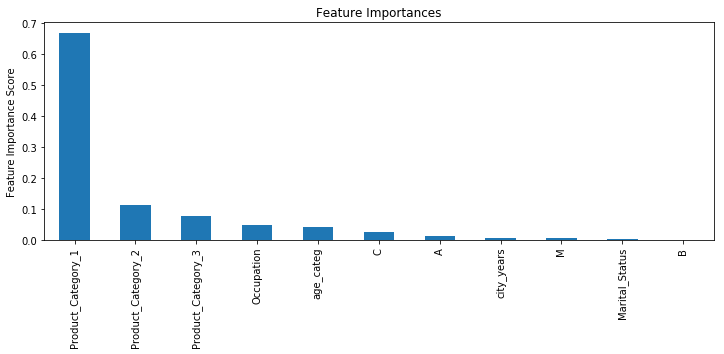

In [43]:
#Choose all predictors except target & IDcols
predictors = [x for x in trainer.columns if x not in [target]]
gbm0 = GradientBoostingRegressor(random_state=10)
modelfit(gbm0, trainer, predictors)

In [44]:
predictors

['Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'age_categ',
 'M',
 'A',
 'B',
 'C',
 'city_years']

In [45]:
trainer_train.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'age_categ', 'M', 'A', 'B',
       'C', 'city_years'],
      dtype='object')

In [46]:
trainer['Purchase'].head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [84]:
#Choose all predictors except target & IDcols
#predictors = [x for x in trainer.columns if x not in [target]]
#param_test1 = {'n_estimators':np.arange(210,311,50)}
#gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
#param_grid = param_test1, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
#gsearch1.fit(trainer[predictors],trainer[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=8,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([210, 260, 310])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [85]:
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -8388839.10561, std: 56373.05852, params: {'n_estimators': 210},
  mean: -8343252.60384, std: 53695.70802, params: {'n_estimators': 260},
  mean: -8313649.90291, std: 54960.27780, params: {'n_estimators': 310}],
 {'n_estimators': 310},
 -8313649.90291245)

In [63]:
#Choose all predictors except target & IDcols
param_test2 = {'learning_rate':[0.1,.3,.5]}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(n_estimators=100, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch2.fit(trainer[predictors],trainer[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: -8605770.67040, std: 66067.55917, params: {'learning_rate': 0.1},
  mean: -8428618.27541, std: 75635.06102, params: {'learning_rate': 0.3},
  mean: -8464457.90113, std: 107530.76791, params: {'learning_rate': 0.5}],
 {'learning_rate': 0.3},
 -8428618.275407236)

In [47]:
param_test3 = {'max_depth':np.arange(4,13,2), 'min_samples_split':np.arange(200,801,200)}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3,n_estimators=100, min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test3, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch3.fit(trainer[predictors],trainer[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: -8864707.71213, std: 53457.94050, params: {'max_depth': 4, 'min_samples_split': 200},
  mean: -8860706.49077, std: 69105.85076, params: {'max_depth': 4, 'min_samples_split': 400},
  mean: -8870500.90518, std: 68982.90894, params: {'max_depth': 4, 'min_samples_split': 600},
  mean: -8885623.00955, std: 77086.62434, params: {'max_depth': 4, 'min_samples_split': 800},
  mean: -8605164.47919, std: 69769.67329, params: {'max_depth': 6, 'min_samples_split': 200},
  mean: -8607068.13883, std: 67308.28023, params: {'max_depth': 6, 'min_samples_split': 400},
  mean: -8601633.88152, std: 74206.97918, params: {'max_depth': 6, 'min_samples_split': 600},
  mean: -8617425.66853, std: 83456.54393, params: {'max_depth': 6, 'min_samples_split': 800},
  mean: -8413656.71668, std: 83373.75213, params: {'max_depth': 8, 'min_samples_split': 200},
  mean: -8397403.65233, std: 71300.17443, params: {'max_depth': 8, 'min_samples_split': 400},
  mean: -8439412.44685, std: 60913.59940, params: {'max_dept

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\sit


Model Report
MSE : 7765480.676
RMSE Score (Train): 2786.661206
CV Score : Mean - -8328572 | Std - 67590.56 | Min - -8456793 | Max - -8256455


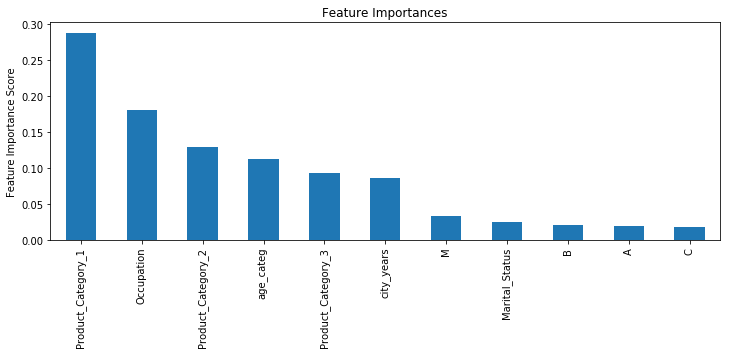

In [49]:
modelfit(gsearch3.best_estimator_, trainer, predictors)

In [51]:
param_test4 = {'min_samples_leaf':np.arange(40,60,5)}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.3,max_depth=12,min_samples_split=800,n_estimators=100, min_samples_leaf=50,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test4, scoring='mean_squared_error',n_jobs=4,iid=False, cv=5)
gsearch4.fit(trainer[predictors],trainer[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: -8339746.49238, std: 67940.29450, params: {'min_samples_leaf': 40},
  mean: -8339756.22719, std: 71894.78217, params: {'min_samples_leaf': 45},
  mean: -8328571.64806, std: 67590.55699, params: {'min_samples_leaf': 50},
  mean: -8327247.64391, std: 73202.62537, params: {'min_samples_leaf': 55}],
 {'min_samples_leaf': 55},
 -8327247.643907609)

C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ashut\Anaconda3\lib\sit


Model Report
MSE : 7755452.877
RMSE Score (Train): 2784.861375
CV Score : Mean - -8327248 | Std - 73202.63 | Min - -8463796 | Max - -8252497


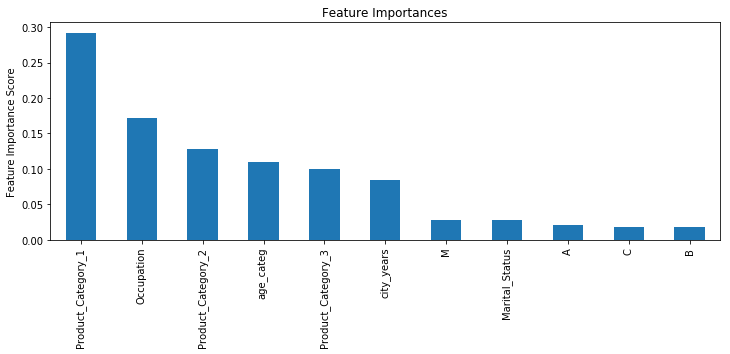

In [52]:
modelfit(gsearch4.best_estimator_, trainer, predictors)

In [55]:
trainer.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,age_categ,M,A,B,C,city_years
0,10,0,3,0.0,0.0,8370,1,0,1,0,0,2
1,10,0,1,6.0,14.0,15200,1,0,1,0,0,2
2,10,0,12,0.0,0.0,1422,1,0,1,0,0,2
3,10,0,12,14.0,0.0,1057,1,0,1,0,0,2
4,16,0,8,0.0,0.0,7969,7,1,0,0,1,4


In [56]:
gsearch4.fit(trainer_train,purchase_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='ls', max_depth=12,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=800,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': array([40, 45, 50, 55])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [57]:
predicted=gsearch4.predict(trainer_test)

In [58]:
predicted

array([ 13833.57764905,   6569.29957405,   7445.09481248, ...,
         7172.10303822,   7242.0821115 ,  15252.92791866])

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

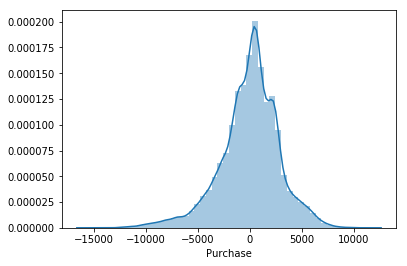

In [61]:
sns.distplot((purchase_test-predicted),bins=50);

In [63]:
print('MAE:', metrics.mean_absolute_error(purchase_test, predicted))
print('MSE:', metrics.mean_squared_error(purchase_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(purchase_test, predicted)))

MAE: 2145.97720076
MSE: 8298388.83126
RMSE: 2880.69242219


In [64]:
tester.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,age_categ,M,A,B,C,city_years
0,7,1,1,11.0,0.0,5,1,0,1,0,2
1,17,0,3,5.0,0.0,3,1,0,0,1,0
2,1,1,5,14.0,0.0,4,0,0,1,0,4
3,1,1,4,9.0,0.0,4,0,0,1,0,4
4,1,0,4,5.0,12.0,3,0,0,0,1,1


In [65]:
predicteded=gsearch4.predict(tester)

In [66]:
predicteded

array([ 16179.57196336,   9632.00735295,   6717.14771681, ...,
        12289.27215358,  21397.31162981,   1430.72996748])

In [67]:
final=pd.read_csv('test.csv')

In [68]:
len(final)

233599

In [69]:
len(predicteded)

233599

In [70]:
final['Purchase']=predicteded

In [71]:
final.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,16179.571963
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,9632.007353
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6717.147717
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2767.601253
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2584.050646


In [72]:
final.to_csv('resgbm.csv')